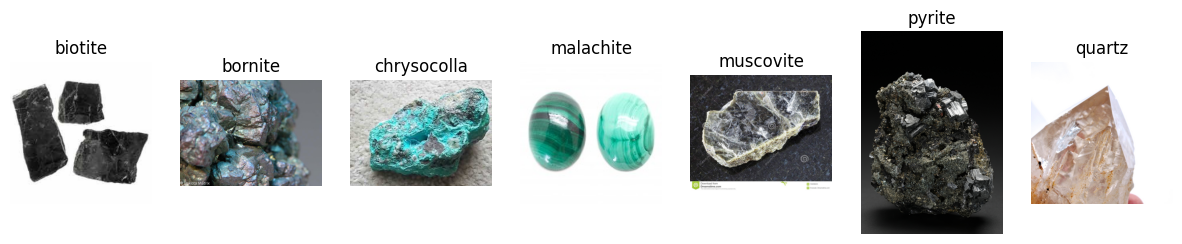

In [2]:
#Select Random Images from Your Dataset
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Set dataset path
dataset_path = "./minet"  # Update with your actual dataset folder path

# Get list of rock categories (subfolders)
categories = [folder for folder in sorted(os.listdir(dataset_path)) if not folder.startswith(".")]

# Select random images (one from each category)
num_samples = 5  # Number of images to select
selected_images = []

for category in categories:
    category_path = os.path.join(dataset_path, category)
    if not os.path.isdir(category_path):
        continue

    image_files = [f for f in os.listdir(category_path) if f.endswith((".jpg", ".png", ".jpeg"))]
    if len(image_files) > 0:
        selected_images.append(os.path.join(category_path, random.choice(image_files)))

# Display selected images
fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))
for i, img_path in enumerate(selected_images):
    img = load_img(img_path)
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(os.path.basename(os.path.dirname(img_path)))

plt.show()


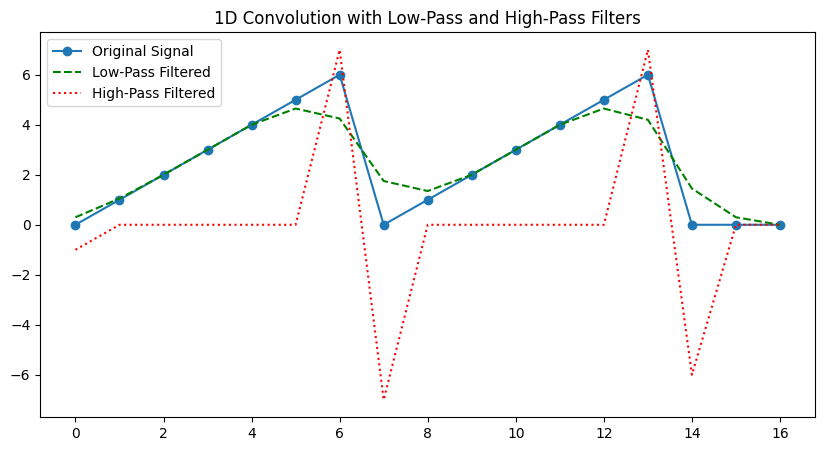

In [3]:
# Apply Convolution Filters to 1D Signal
import numpy as np
import matplotlib.pyplot as plt

# Given signal X
X = np.array([0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0])

# Low-pass filter
H_L = np.array([0.05, 0.2, 0.5, 0.2, 0.05])

# High-pass filter
H_H = np.array([-1, 2, -1])

# Apply convolution
y_low = np.convolve(X, H_L, mode='same')
y_high = np.convolve(X, H_H, mode='same')

# Plot original signal and filtered signals
plt.figure(figsize=(10, 5))
plt.plot(X, label="Original Signal", marker='o')
plt.plot(y_low, label="Low-Pass Filtered", linestyle="--", color="g")
plt.plot(y_high, label="High-Pass Filtered", linestyle=":", color="r")
plt.legend()
plt.title("1D Convolution with Low-Pass and High-Pass Filters")
plt.show()


In [6]:
%pip install scikit-image


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


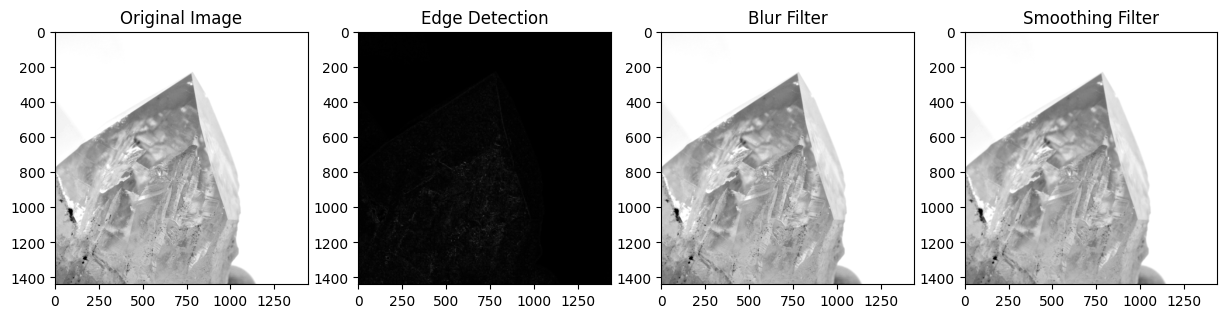

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
%pip install scikit-image
from skimage.io import imread
from skimage.color import rgb2gray

# Select a random image from the previously picked images
random_img_path = random.choice(selected_images)

# Load image
img = imread(random_img_path)
img_gray = rgb2gray(img) * 255  # Convert to grayscale

# Define convolution filters
filter1 = np.array([[ 0, -1,  0], [-1, 4, -1], [ 0, -1,  0]])  # Edge Detection
filter2 = np.array([[0.2, 0.5,  0.2], [0.5, 1, 0.5], [0.2, 0.5, 0.2]])  # Blur
filter3 = np.ones((5, 5)) / 25  # Smoothing Filter

# Apply convolution
filtered1 = convolve2d(img_gray, filter1, mode='same', boundary='symm')
filtered2 = convolve2d(img_gray, filter2, mode='same', boundary='symm')
filtered3 = convolve2d(img_gray, filter3, mode='same', boundary='symm')

# Plot original and filtered images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Image")
axes[1].imshow(np.abs(filtered1), cmap='gray')
axes[1].set_title("Edge Detection")
axes[2].imshow(filtered2, cmap='gray')
axes[2].set_title("Blur Filter")
axes[3].imshow(filtered3, cmap='gray')
axes[3].set_title("Smoothing Filter")
plt.show()


In [11]:
# A3: Train MLP Classifier on a Random Subset of Images
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load extracted features dataset
df = pd.read_csv("./RockClassfication/rock_features.csv")  # Ensure features are extracted before running this

# Select a random subset (e.g., 50% of the data)
subset_size = 0.5  # Change this to train on more/fewer images
df_subset = df.sample(frac=subset_size, random_state=42)

# Split data into features and labels
X = df_subset.iloc[:, :-1].values
y = df_subset["label"].values

# One-hot encode labels
y = to_categorical(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Save model
model.save("rock_classifier.h5")
print(f"Model training complete. Saved as 'rock_classifier.h5' using {len(X_train)} images.")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4348 - loss: 1.6439 - val_accuracy: 0.6667 - val_loss: 0.9438
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9736 - loss: 0.1816 - val_accuracy: 0.7396 - val_loss: 0.7565
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0480 - val_accuracy: 0.7500 - val_loss: 0.7363
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0175 - val_accuracy: 0.7812 - val_loss: 0.7710
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 0.7812 - val_loss: 0.7889
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.7812 - val_loss: 0.7967
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.7708 - val_loss: 0.8039
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.7604 - val_loss:

Model training complete. Saved as 'rock_classifier.h5' using 380 images.


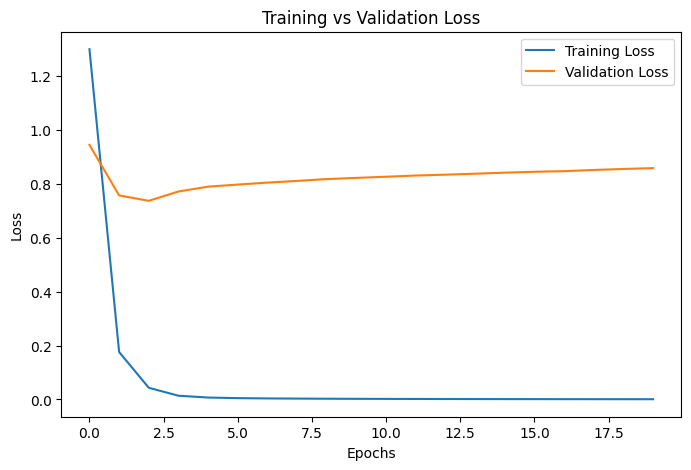

In [12]:
# Plot training & validation loss A4: Training vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


In [13]:
# A5: Test Model on Randomly Selected Images
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import numpy as np

# Load trained MLP model
model = load_model("rock_classifier.h5")

# Load pre-trained ResNet50 model for feature extraction
feature_extractor = ResNet50(weights="imagenet", include_top=False, pooling="avg")

# Function to extract features from an image
def extract_features(img_path):
    img = load_img(img_path, target_size=(224, 224))  # Resize image
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features using ResNet50
    features = feature_extractor.predict(img_array)
    return features.flatten().reshape(1, -1)  # Reshape for MLP model

# Predict class for each randomly selected image
for img_path in selected_images:
    img_features = extract_features(img_path)  # Extract features
    prediction = model.predict(img_features)  # Predict using MLP model
    predicted_class = np.argmax(prediction)

    print(f"Image: {img_path}")
    print(f"Predicted Class: {categories[predicted_class]}\n")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Image: ./minet/biotite/0013.jpg
Predicted Class: biotite

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Image: ./minet/bornite/0114.jpg
Predicted Class: bornite

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Image: ./minet/chrysocolla/0100.jpg
Predicted Class: chrysocolla

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Image: ./minet/malachite/0063.jpg
Predicted Class: malachite

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Image: ./minet/muscovite/0004.jpg
Predicted Class: muscovite

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Image: ./minet/pyrite/0043.jpg
Predicted Class: pyrite

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Image: ./minet/quartz/0018.jpg
Predicted Class: muscovite


In [16]:
# Generate a Table of Predictions
import pandas as pd
%pip install tabulate
from tabulate import tabulate  # Install via: pip install tabulate

# Store results
results = []

for img_path in selected_images:
    img_features = extract_features(img_path)  # Extract features
    prediction = model.predict(img_features)  # Predict using MLP model
    predicted_class = np.argmax(prediction)

    # Get actual class from folder name
    actual_class = os.path.basename(os.path.dirname(img_path))

    results.append([os.path.basename(img_path), actual_class, categories[predicted_class]])

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["Image", "Actual Class", "Predicted Class"])

# Print as table
print(tabulate(df_results, headers="keys", tablefmt="pretty"))

# Save to CSV
df_results.to_csv("test_predictions.csv", index=False)
print("\nPredictions saved as 'test_predictions.csv'")



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
+---+----------+--------------+-----------------+
|   |  Image   | Actual Class | Predicted Class |
+---+----------+--------------+-----------------+
| 0 | 0013.jpg |   biotite    |     biotite     |
| 1 | 0114.jpg |   bornite    |     bornite     |
| 2 | 0100.jpg | chrysocolla  |   chryso